In [29]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
sm_branches = pd.read_csv('./50_SupermarketBranches.csv')
sm_members = pd.read_csv('./Supermarket_CustomerMembers.csv')

sm_branches.shape,sm_members.shape

((50, 5), (200, 5))

In [32]:
sm_branches.head()

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
sm_members.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


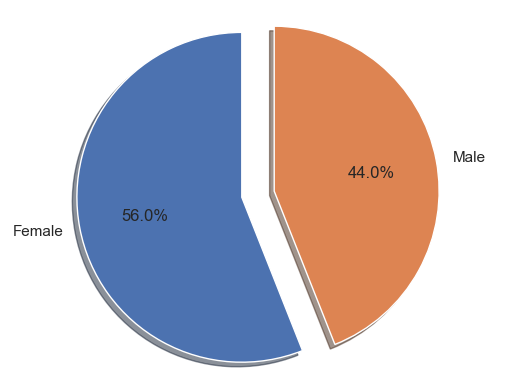

In [34]:
countsT = sm_members['Genre'].value_counts()
labels = 'Female' ,'Male'
sizes = countsT.values
explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

Text(0.5, 0, 'Age')

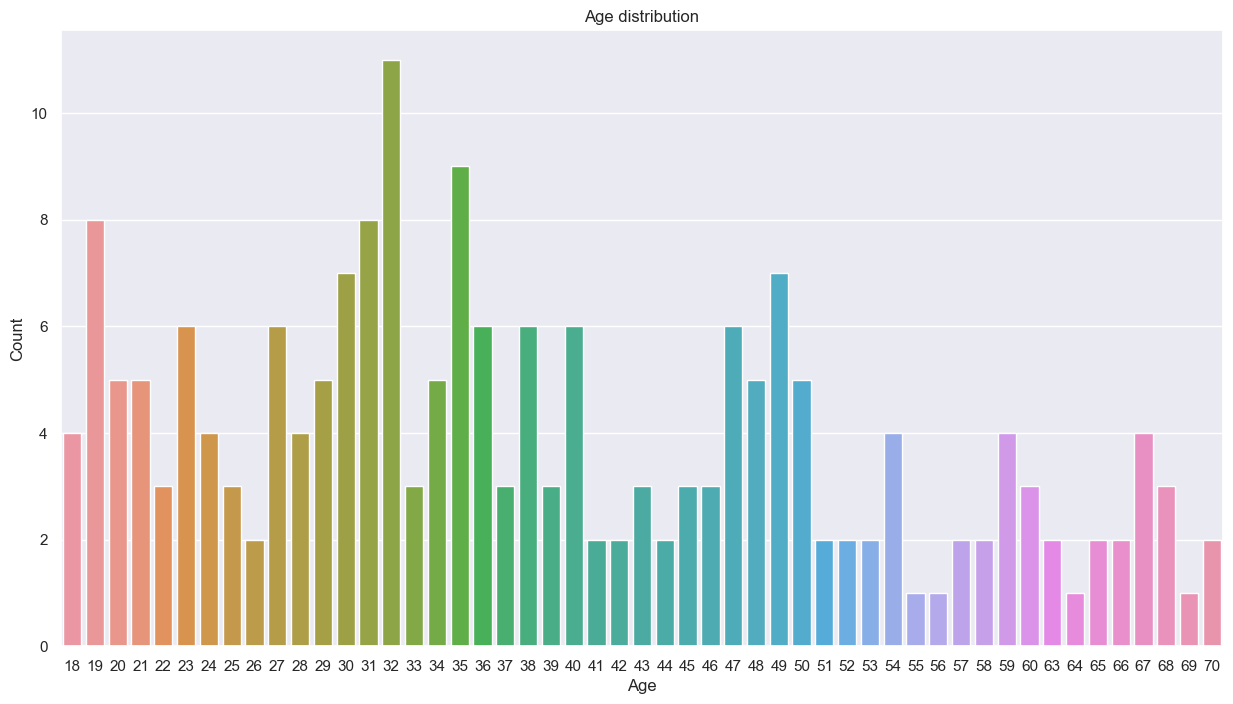

In [35]:
age_values = sm_members.Age.value_counts()
age_labels = age_values.index
plt.figure(figsize=(15,8))
ax = sns.barplot(x=age_labels,y=age_values)
ax.set_title('Age distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Age')

In [36]:
#Average spending by a customer
fm_spending_avg = sm_members.groupby('Genre')['Spending Score (1-100)'].sum()['Female']/112
print('Average spending by a female customer is {}'.format(fm_spending_avg))

m_spending_avg = sm_members.groupby('Genre')['Spending Score (1-100)'].sum()['Male']/88
print('Average spending by a Male customer is {}'.format(m_spending_avg))

avg_spending = sm_members['Spending Score (1-100)'].sum()/200
print('Average spending by a customer is {}'.format(avg_spending))

Average spending by a female customer is 51.526785714285715
Average spending by a Male customer is 48.51136363636363
Average spending by a customer is 50.2


In [37]:
#Average income of a customer
fm_income_avg = sm_members.groupby('Genre')['Annual Income (k$)'].sum()['Female']/112
print('Average income of a female customer is {}k'.format(fm_income_avg))

m_income_avg = sm_members.groupby('Genre')['Annual Income (k$)'].sum()['Male']/88
print('Average income of a Male customer is {}k'.format(m_income_avg))

avg_income = sm_members['Annual Income (k$)'].sum()/200
print('Average income of a customer is {}k'.format(avg_income))

Average income of a female customer is 59.25k
Average income of a Male customer is 62.22727272727273k
Average income of a customer is 60.56k


<Figure size 1500x800 with 0 Axes>

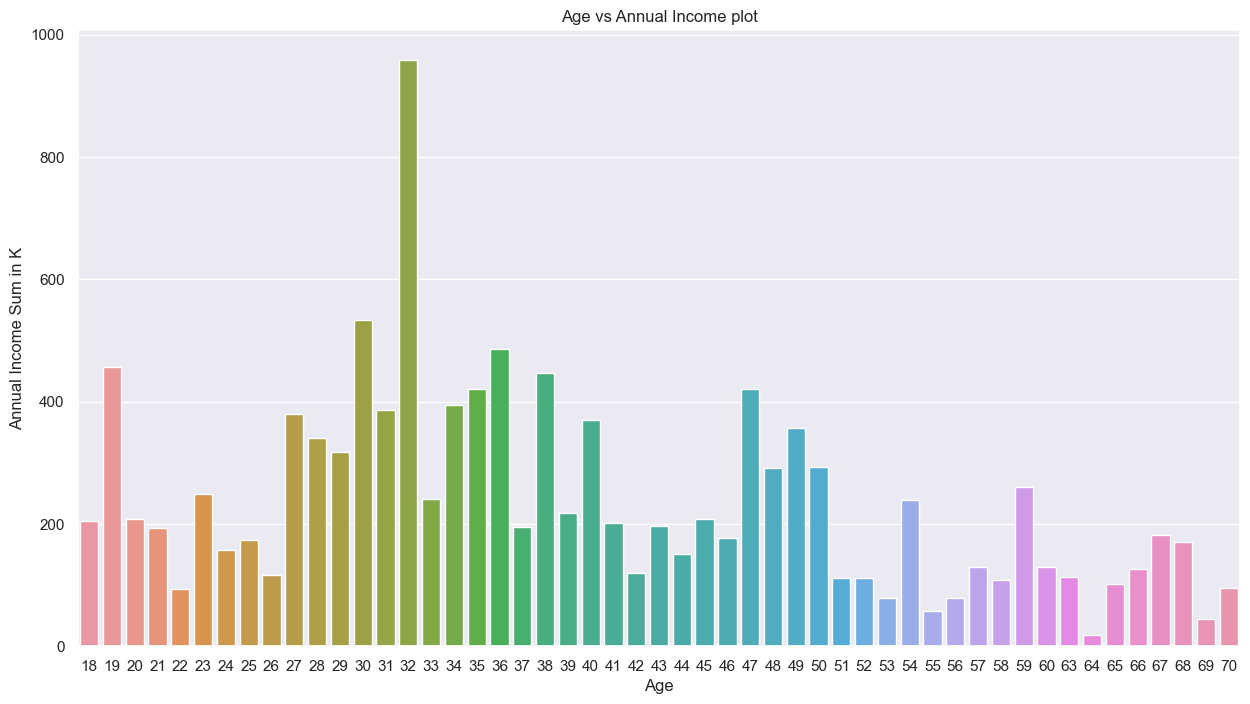

<Figure size 1500x800 with 0 Axes>

In [38]:
xn = sm_members.groupby('Age')['Annual Income (k$)'].sum()
xn.reset_index(drop=False)
values = xn.values
labels = xn.index
plt.figure(figsize=(15,8))
ax=sns.barplot(x=labels,y=values)
ax.set_title('Age vs Annual Income plot')
ax.set_ylabel('Annual Income Sum in K')
ax.set_xlabel('Age')
plt.figure(figsize=(15,8))

Text(0.5, 0, 'Age')

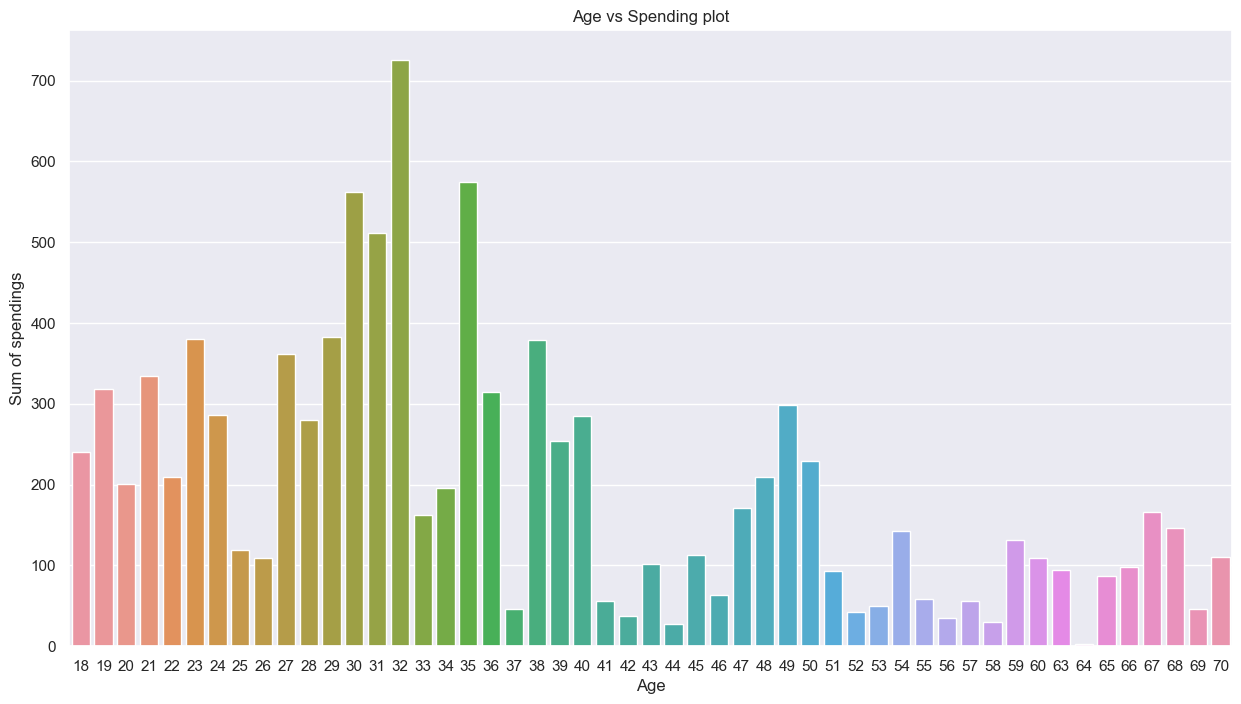

In [39]:
xn = sm_members.groupby('Age')['Spending Score (1-100)'].sum()
xn.reset_index(drop=False)
values = xn.values
labels = xn.index
plt.figure(figsize=(15,8))
ax=sns.barplot(x=labels,y=values)
ax.set_title('Age vs Spending plot')
ax.set_ylabel('Sum of spendings')
ax.set_xlabel('Age')

In [40]:
sm_branches.head(5)

,Advertisement Spend,Promotion Spend,Administration Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Text(0.5, 0, 'State')

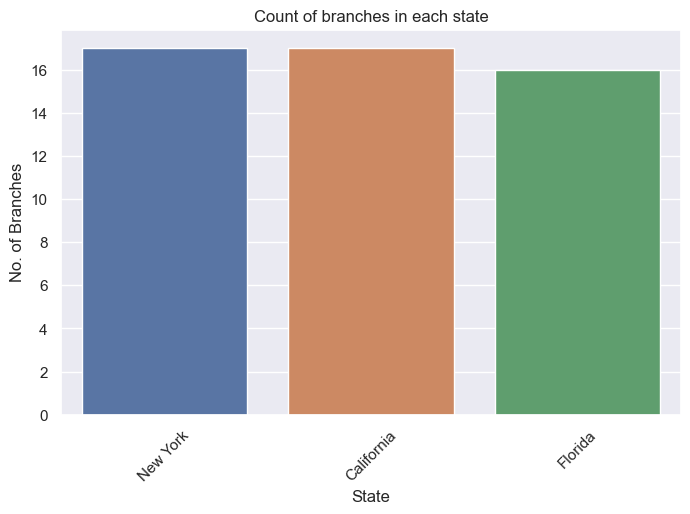

In [41]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=sm_branches['State'], data=sm_branches)
ax.set_title('Count of branches in each state')
ax.set_ylabel('No. of Branches')
ax.set_xlabel('State')

In [42]:
coun = 0
coun1 = 0
for i in sm_branches['State']:
    if i == 'Florida':
        coun = coun+1
    if i == 'New York':
        coun1 = coun1+1
print(coun,coun1)

16 17


In [43]:
#Florida
florida_profit = sm_branches.groupby('State')['Profit'].sum()['Florida']
print('Total profit at all the branches in florida is {}'.format(florida_profit))
print('Avg profit at branches in florida is {}'.format(florida_profit/16))
print('\n')
#New York
new_york_profit = sm_branches.groupby('State')['Profit'].sum()['New York']
print('Total profit at all the branches in New York is {}'.format(new_york_profit))
print('Avg profit at branches in New York is {}'.format(new_york_profit/17))
print('\n')

#California
california_profit = sm_branches.groupby('State')['Profit'].sum()['California']
print('Total profit at all the branches in California is {}'.format(california_profit))
print('Avg profit at branches in California is {}'.format(california_profit/17))

Total profit at all the branches in florida is 1900384.3900000001
Avg profit at branches in florida is 118774.02437500001


Total profit at all the branches in New York is 1933859.5899999999
Avg profit at branches in New York is 113756.44647058823


Total profit at all the branches in California is 1766387.98
Avg profit at branches in California is 103905.17529411765


In [44]:
#Florida
florida_ad_spent = sm_branches.groupby('State')['Advertisement Spend'].sum()['Florida']
print('Total Advertisement Spendings at all the branches in florida is {}'.format(florida_ad_spent))
print('Avg Advertisement Spendings at branches in florida is {}'.format(florida_ad_spent/16))
print('\n')
#New York
new_york_ad_spent = sm_branches.groupby('State')['Advertisement Spend'].sum()['New York']
print('Total Advertisement Spendings at all the branches in New York is {}'.format(new_york_ad_spent))
print('Avg Advertisement Spendings at branches in New York is {}'.format(new_york_ad_spent/17))
print('\n')

#California
california_ad_spent = sm_branches.groupby('State')['Advertisement Spend'].sum()['California']
print('Total Advertisement Spendings at all the branches in California is {}'.format(california_ad_spent))
print('Avg Advertisement Spendings at branches in California is {}'.format(california_ad_spent/17))

Total Advertisement Spendings at all the branches in florida is 1291584.26
Avg Advertisement Spendings at branches in florida is 80724.01625


Total Advertisement Spendings at all the branches in New York is 1295316.06
Avg Advertisement Spendings at branches in New York is 76195.06235294118


Total Advertisement Spendings at all the branches in California is 1099180.46
Avg Advertisement Spendings at branches in California is 64657.67411764705


In [45]:
#Florida
florida_prm_spent = sm_branches.groupby('State')['Promotion Spend'].sum()['Florida']
print('Total Promotion Spendings at all the branches in florida is {}'.format(florida_prm_spent))
print('Avg Promotion Spendings at branches in florida is {}'.format(florida_prm_spent/16))
print('\n')
#New York
new_york_prm_spent = sm_branches.groupby('State')['Promotion Spend'].sum()['New York']
print('Total Promotion Spendings at all the branches in New York is {}'.format(new_york_prm_spent))
print('Avg Promotion Spendings at branches in New York is {}'.format(new_york_prm_spent/17))
print('\n')

#California
california_prm_spent = sm_branches.groupby('State')['Promotion Spend'].sum()['California']
print('Total Promotion Spendings at all the branches in California is {}'.format(california_prm_spent))
print('Avg Promotion Spendings at branches in California is {}'.format(california_prm_spent/17))

Total Promotion Spendings at all the branches in florida is 1948302.36
Avg Promotion Spendings at branches in florida is 121768.8975


Total Promotion Spendings at all the branches in New York is 2066239.0
Avg Promotion Spendings at branches in New York is 121543.4705882353


Total Promotion Spendings at all the branches in California is 2052690.62
Avg Promotion Spendings at branches in California is 120746.50705882354


Text(0.5, 0, 'Branch')

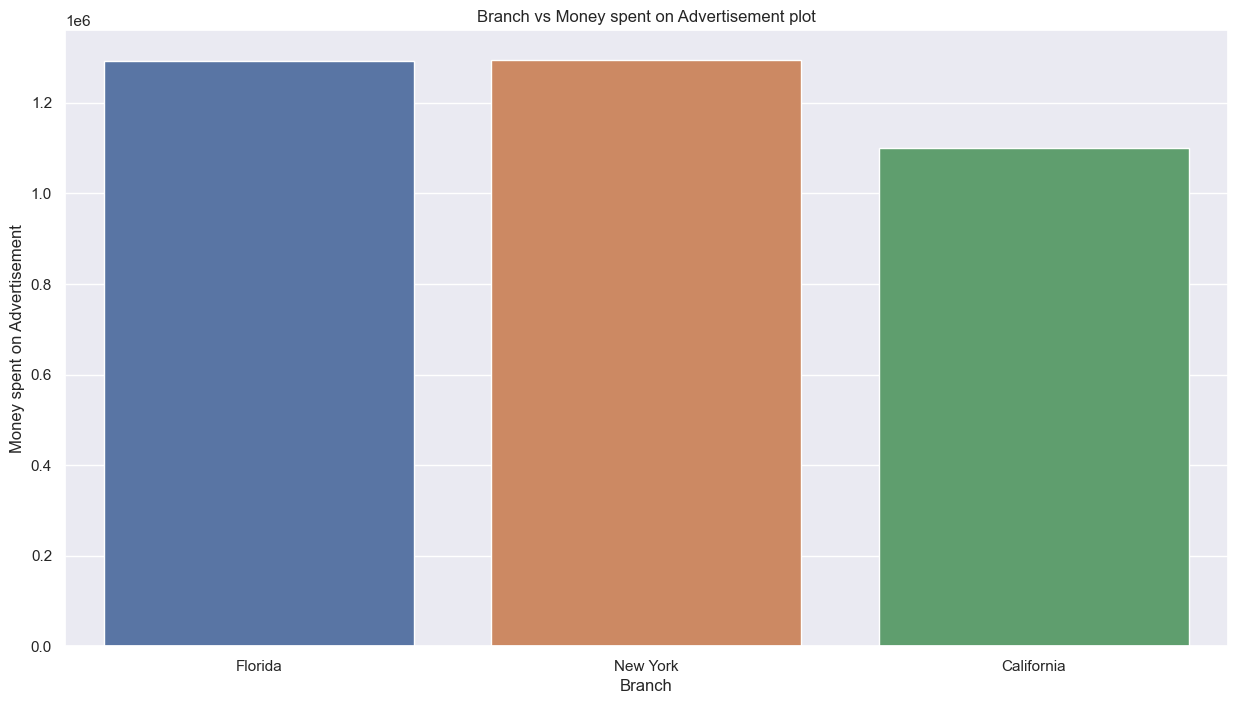

In [46]:
ad_spend_list = [florida_ad_spent,new_york_ad_spent,california_ad_spent]
cities = ['Florida','New York','California']
pr_spend_list = [florida_prm_spent,new_york_prm_spent,california_prm_spent]
plt.figure(figsize=(15,8))
ax=sns.barplot(y=ad_spend_list[:],x=cities[:])
ax.set_title('Branch vs Money spent on Advertisement plot')
ax.set_ylabel('Money spent on Advertisement')
ax.set_xlabel('Branch')

Text(0.5, 0, 'Branch')

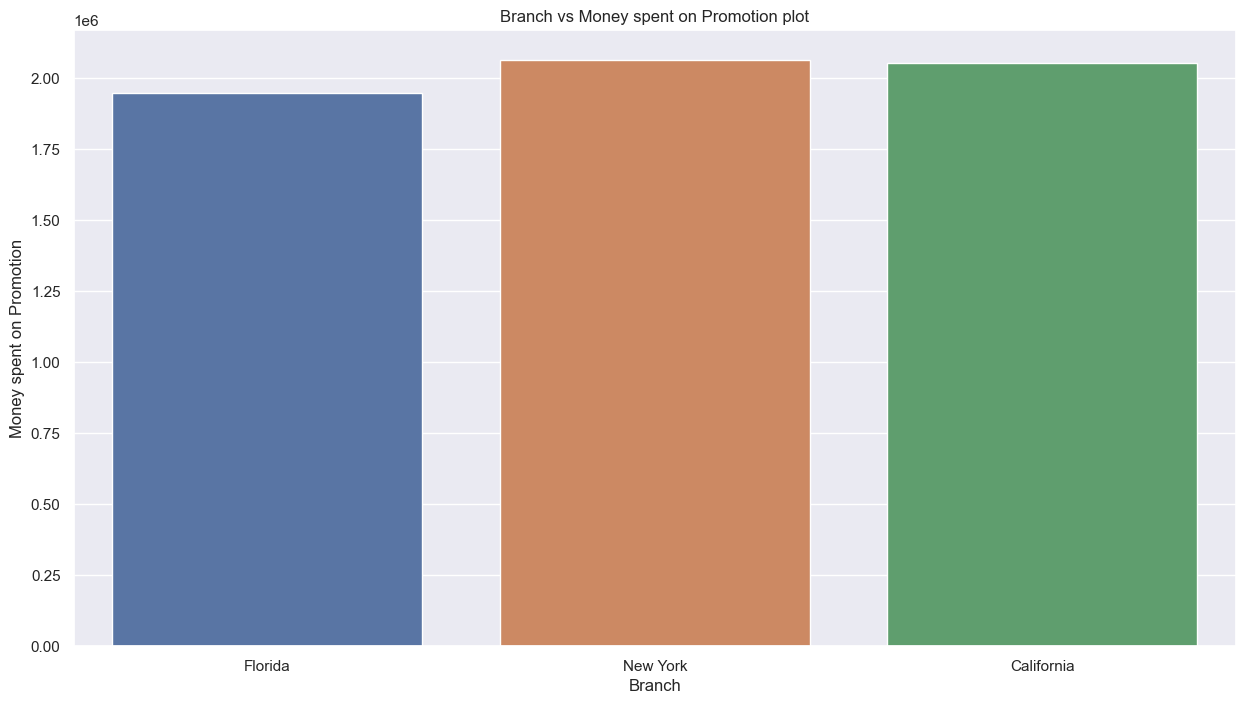

In [47]:
plt.figure(figsize=(15,8))
ax=sns.barplot(y=pr_spend_list[:],x=cities[:])
ax.set_title('Branch vs Money spent on Promotion plot')
ax.set_ylabel('Money spent on Promotion')
ax.set_xlabel('Branch')

In [48]:
basket = pd.read_csv('./Market_Basket_Optimisation.csv')
basket.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [50]:
names = ' '
for name in basket.shrimp:
    name = str(name)
    names = names + name + ' '
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
basket.shrimp.nunique()

In [ ]:
ads = pd.read_csv('./Ads_CTR_Optimisation.csv')
ads.head(5)

In [ ]:
ads.info()

In [ ]:
xn = ads.sum(axis = 0, skipna = True) 
xn.reset_index(drop=False)
values = xn.values
labels = xn.index
plt.figure(figsize=(15,8))
ax=sns.barplot(x=labels,y=values)
ax.set_title('Ads vs Count plot')
ax.set_ylabel('Count')
ax.set_xlabel('Ad Type')

**Correlation Matrix for Super Market Branches**

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(sm_branches, 8)

**Correlation Matrix for Super Market Members**

In [ ]:
plotCorrelationMatrix(sm_members, 8)